In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from yaml import safe_load, YAMLError
from src import snapshots_assembly, SVD

In [3]:
with open("parameters.yaml", "r") as stream:
    try:
        params = safe_load(stream)
    except YAMLError as exc:
        print(exc)

In [4]:
params

{'snapshots': {'file_type_str': 'h5_fenics',
  'folder': 'data',
  'file_name_contains': ['concentration'],
  'dataset': None}}

In [5]:
filenames, snapshots = snapshots_assembly(params["snapshots"])

2024-01-10 11:24:38,327 - src.snapshots - INFO - Starting choice of file type:
2024-01-10 11:24:38,328 - src.snapshots - INFO - FEniCS HDF5 file selected.
Loading Snapshots 2701: 100%|██████████| 2701/2701 [02:03<00:00, 21.83it/s]


In [17]:
svd_params = {
    "preprocessing_type": "min_max",
    "trunc_basis": snapshots.shape[1],
    "svd_type": "full_svd",  # ["full_svd", "randomized_svd"]
    "power_iterations": 1,
    "oversampling": 20,
}

svd_step = SVD(snapshots, svd_params)
svd_step.fit()
svd_step.s.shape

a


(2702,)

In [22]:
svd_params = {
    "trunc_basis": 200,
    "svd_type": "randomized_svd",  # ["full_svd", "randomized_svd"]
    "power_iterations": 1,
    "oversampling": 20,
}

svd_step_random = SVD(snapshots, svd_params)
svd_step_random.fit()
svd_step_random.s.shape

b


(220,)

In [25]:
svd_step_random.s[:220] - svd_step.s[:220]

array([-9.09494702e-13, -1.13686838e-12, -1.13686838e-13,  5.68434189e-13,
       -9.09494702e-13,  3.41060513e-13, -1.13686838e-13, -1.13686838e-13,
       -5.68434189e-14,  0.00000000e+00,  8.52651283e-14,  5.68434189e-14,
        2.84217094e-14, -2.84217094e-14,  5.68434189e-14, -5.68434189e-14,
       -8.52651283e-14, -2.84217094e-14, -1.13686838e-13, -1.42108547e-14,
        1.13686838e-13, -9.94759830e-14,  2.84217094e-14,  2.84217094e-14,
       -8.52651283e-14, -1.56319402e-13, -5.68434189e-14, -1.70530257e-13,
       -9.94759830e-14, -8.52651283e-14, -8.52651283e-14, -2.13162821e-13,
       -2.13162821e-13, -2.77111667e-13, -1.70530257e-13, -3.26849658e-13,
       -3.97903932e-13, -4.54747351e-13, -1.27897692e-13, -3.76587650e-13,
       -1.53477231e-12, -7.24753590e-13, -1.41398004e-12, -7.38964445e-13,
       -4.82458518e-12, -1.98951966e-12, -9.52127266e-13, -4.04298817e-12,
       -2.13873363e-12, -3.43902684e-12, -6.30961949e-12, -5.16919840e-12,
       -3.52784468e-12, -

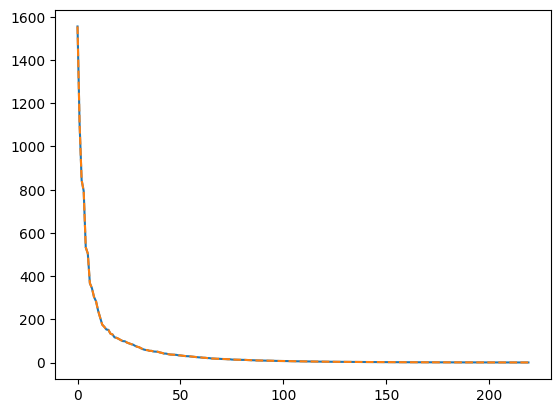

In [29]:
import matplotlib.pyplot as plt

plt.plot(svd_step_random.s[:220])
plt.plot(svd_step.s[:220], "--")
plt.show()